## This notebook and Open-CV was used iteratively to produce videos from images and vice versa

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from os.path import isfile, join

### Create videos from colorized frames

In [ ]:
paths = [r"Desktop\Fully-Automatic-Video-Colorization-with-Self-Regularization-and-Diversity\ckpt_woflow\sampleVid\result{}\\".format(i) for i in range(5)]

for n, pathIn in enumerate(paths):
    
    pathOut = 'video{}.avi'.format(n)
    
    fps = 25
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    files.sort(key = lambda x: x[5:-4])

    for i in range(len(files)):
        filename = pathIn + files[i]
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        frame_array.append(img)
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    
    for i in range(len(frame_array)):
        out.write(frame_array[i])
    out.release()

## Merge two videos from the end results vs original comparison 

In [6]:
pathIn = r"Desktop/outfiles\\"
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort(key = lambda x: x[5:-4])

pathIn_original = r"Desktop/originalFrames\\"
files2 = [f for f in os.listdir(pathIn2) if isfile(join(pathIn2, f))]
files2.sort(key = lambda x: x[:5])

padArray = [0,0,0]
pathOut = 'mergedVideo.avi'
fps = 50

In [ ]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, (1280, 480))
size = (640, 480) # Original video resolution

for i in range(len(files)):

    filename = pathIn + files[i]
    filename2 = pathIn2 + files2[i]
    
    img = cv2.imread(filename)
    img = cv2.resize(img, size, interpolation = cv2.INTER_AREA)
    img2 = cv2.imread(filename2)
    height, width, layers = img.shape
    
    out.write(np.concatenate((img, img2), axis=1)) # Merge frames horizontally
    
out.release()

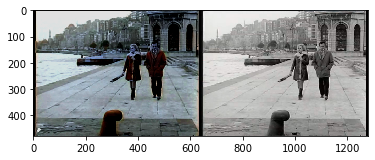

In [187]:
plt.imshow(cv2.cvtColor(np.concatenate((img, img2), axis=1), cv2.COLOR_BGR2RGB))

## Write end result video from 4K frames that were created by using super-resolution repository

In [128]:
pathIn = r"Desktop\super-resolution\output\finales\\"

In [129]:
size = (3840, 2160) # 4K Resolution

In [ ]:
pathOut = 'OriginalColors4K.avi'
fps = 50
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort(key = lambda x: x[5:-4])

In [ ]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(files)):

    filename = pathIn + files[i]
    
    img = cv2.imread(filename)
    img= cv2.copyMakeBorder(img.copy(),0,0,480,480,cv2.BORDER_CONSTANT,value=BLUE)
    
    out.write(img)
    
out.release()

## Visualize padding

In [51]:
image = cv2.imread("corrected4K.png")
image = cv2.copyMakeBorder(image.copy(), 0, 0, 480, 480, cv2.BORDER_CONSTANT, value = padArray)

In [52]:
image.shape

(2160, 3840, 3)

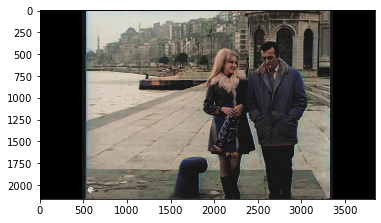

In [47]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Parse frames from the sample video

In [ ]:
writePath = r"Desktop\out\\"

vidcap = cv2.VideoCapture(r'Desktop/video_720p60.avi')
success,image = vidcap.read()
count = 0

while success:
    image = cv2.resize(image, size, interpolation = cv2.INTER_AREA)
    cv2.imwrite(writePath + "%05d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    count += 1

## Check FPS of the sample video


In [60]:
video = cv2.VideoCapture(r"Desktop/sampleVideo.avi");

(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

if int(major_ver)  < 3 :
    fps = video.get(cv2.cv.CV_CAP_PROP_FPS)
    print("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
else :
    fps = video.get(cv2.CAP_PROP_FPS)
    print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))
    video.release()

Frames per second using video.get(cv2.CAP_PROP_FPS) : 50.0
